KMeans Clustering

In [ ]:
import random
import math
import json
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is the pseudocode loads data from file and save in the numpy matrix.
You can also use panda to read the dataset into numpy matrix. data matrix will have data points. Columns have features. Rows have data points  ClassLabel has the labels.

In [ ]:
def load(file_name):
  dataset = pd.read_csv(file_name, header = None)
  data = dataset.iloc[:,0:-1].to_numpy()
  classLabel = dataset.iloc[:,3].to_numpy()
  return data, classLabel

simple centroid initialization function

In [ ]:
def initialize_centroids_simple(data, dimension, k):
    #centroids: [[centroid0:  3 dimensions, , , ]; [centroid1: 3 dimensions ] ... ..]
    centroids = np.array([[0 for _ in range(dimension)] for _ in range(k)])
    #TO DO
    #Write your code to return initialized centroids by randomly assiging them to K points
    centroids_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_indices, :]
    return centroids

Centroid initilization using min max

Calculate eucledian distance

In [ ]:
def get_euclidean_distance(p1, p2):
    #TODO
    #Write your code
    distance = np.sqrt(np.sum((p1 - p2) ** 2))
    return distance

KMeans Function


In [ ]:
def kmeans(data, dimension, k):
    N = np.size(data, 0)
    #centroids: [[centroid0:  , , ,3 dimensions, , , ],  [centroid1: , , ,3 dimensions, , , ],  ... ..]
    centroids = initialize_centroids_simple(data, dimension, k)
    #cluster_affiliation: cluster_affiliation = [clusternumber, clutsernumber, ..., ..., ..., ...]

    #initialize the cluster affiliations. Initially assign -1
    cluster_affiliation = np.array([-1 for _ in range(0, N)])
    flag = 1
    Jprev = 0
    while flag:
        #find closest centroids for each data points
        distances = np.array([[get_euclidean_distance(point, centroid) for centroid in centroids] for point in data])

        #record or update cluster for each data points
        cluster_affiliation = np.argmin(distances, axis=1)

        #recompute centroids
        centroids = np.array([[0 for _ in range(dimension)] for _ in range(k)]) # new centroids initialized with 0
        #keep number of points for each cluster. You should use cluster_affiliation to calculate it

        #TO DO
        #write your code to count each cluster pointcount and store them in cluster_point_count structure
        cluster_point_count = np.bincount(cluster_affiliation, minlength=k)

        #TODO
        #recompute centroids using the count
        for i in range(k):
            if cluster_point_count[i] > 0:
                centroids[i] = np.mean(data[cluster_affiliation == i], axis=0)

        #TODO
        #write your own code  to terminate the process based on the termination criteria. We evaluate the quality
        #of the clustering using the clustering objective discussed in the class.
        #we terminate when |J − Jprev| ≤ math.power(10,−5)*J, where Jprev is the value of J after the previous iteration).
        #Set flag = 0 if |J − Jprev| ≤ math.power(10,−5)*J

        J = np.sum(np.min(distances, axis=1))/N
        if abs(J - Jprev) <= 1e-5 * J:
            flag = 0
        Jprev = J
    return (centroids, cluster_affiliation)

Driver funtion/Main Function

In [ ]:
def main():
    #input path of the real data
    #data file contains point index, 4 features, and class label in each line separated by comma
    K = 3 # K clusters

    inputfilename = '/content/drive/MyDrive/Data Mining/iris.csv'
    data, ClassLabel = load(inputfilename)
    dimension = np.size(data, 1)# number of  data dimension in the data
    #dimension = dimension - 1 # We are using 3 dimensions but the data set has been trimmed beforehand
    #numpy array: centroids =  [[centroid0:  , , ,3 dimensions, , , ]; [centroid1: , , ,3 dimensions, , , ] ... ..]
    #numpy array: cluster_affiliation = [clusternumber, clutsernumber, ..., ..., ..., ...]
    centroids, cluster_affiliation = kmeans(data, dimension, K)
    return data, ClassLabel, centroids, cluster_affiliation

if __name__ == "__main__":
	  data, classLabel, centroids, cluster_affiliation = main()

(150, 3)
(150,)
(150, 3)
(150,)
(150, 3)
(150,)
(150, 3)
(150,)


3D Plotting the K-means Algorithm Result

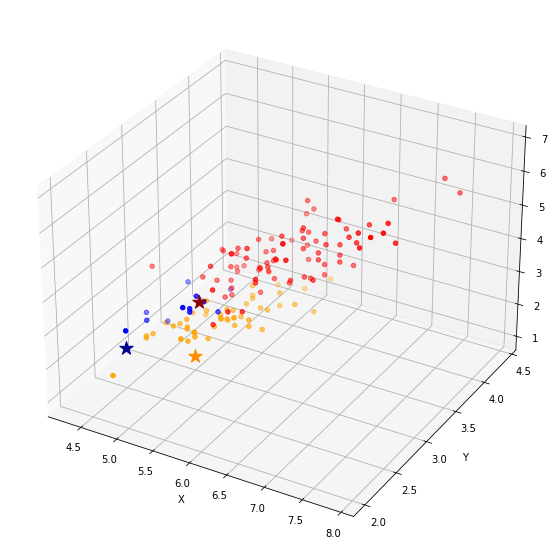

In [ ]:
cluster_0_points = data[cluster_affiliation == 0]
cluster_1_points = data[cluster_affiliation == 1]
cluster_2_points = data[cluster_affiliation == 2]

# Plot the data points
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

#Data Points
ax.scatter(cluster_0_points[:,0], cluster_0_points[:,1], cluster_0_points[:,2], c='blue')
ax.scatter(cluster_1_points[:,0], cluster_1_points[:,1], cluster_1_points[:,2], c='red')
ax.scatter(cluster_2_points[:,0], cluster_2_points[:,1], cluster_2_points[:,2], c='orange')

#Centroids
ax.scatter(centroids[0,0], centroids[0,1], centroids[0,2], c='darkblue', s=200, marker='*')
ax.scatter(centroids[1,0], centroids[1,1], centroids[1,2], c='darkred', s=200, marker='*')
ax.scatter(centroids[2,0], centroids[2,1], centroids[2,2], c='darkorange', s=200, marker='*')

#Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Plotting with better visualization and labels using ClassLabel data

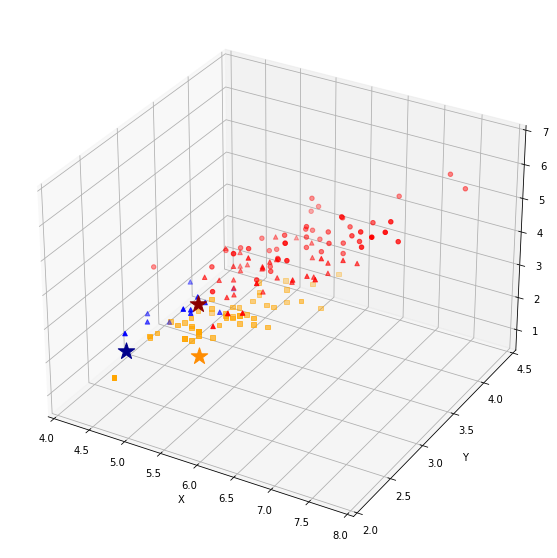

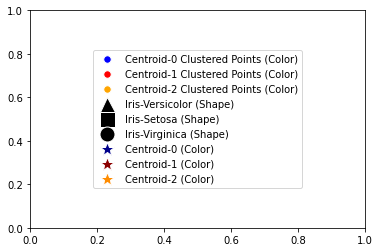

In [ ]:
from matplotlib.lines import Line2D

cluster_0_versi = data[(cluster_affiliation == 0) & (classLabel=='Iris-versicolor')]
cluster_0_setosa = data[(cluster_affiliation == 0) & (classLabel=='Iris-setosa')]
cluster_0_virginica = data[(cluster_affiliation == 0) & (classLabel=='Iris-virginica')]

cluster_1_versi = data[(cluster_affiliation == 1) & (classLabel=='Iris-versicolor')]
cluster_1_setosa = data[(cluster_affiliation == 1) & (classLabel=='Iris-setosa')]
cluster_1_virginica = data[(cluster_affiliation == 1) & (classLabel=='Iris-virginica')]

cluster_2_versi = data[(cluster_affiliation == 2) & (classLabel=='Iris-versicolor')]
cluster_2_setosa = data[(cluster_affiliation == 2) & (classLabel=='Iris-setosa')]
cluster_2_virginica = data[(cluster_affiliation == 2) & (classLabel=='Iris-virginica')]

# Plot the data points
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim([4, 8])
ax.set_ylim([2, 4.5])
ax.set_zlim([.5, 7])

#Data Points for Classes
#Cluster-0
ax.scatter(cluster_0_versi[:,0], cluster_0_versi[:,1], cluster_0_versi[:,2], c='blue', marker='^')
ax.scatter(cluster_0_setosa[:,0], cluster_0_setosa[:,1], cluster_0_setosa[:,2], c='blue', marker='s')
ax.scatter(cluster_0_virginica[:,0], cluster_0_virginica[:,1], cluster_0_virginica[:,2], c='blue', marker='o')

#Cluster-1
ax.scatter(cluster_1_versi[:,0], cluster_1_versi[:,1], cluster_1_versi[:,2], c='red', marker='^')
ax.scatter(cluster_1_setosa[:,0], cluster_1_setosa[:,1], cluster_1_setosa[:,2], c='red', marker='s')
ax.scatter(cluster_1_virginica[:,0], cluster_1_virginica[:,1], cluster_1_virginica[:,2], c='red', marker='o')
#Cluster-2
ax.scatter(cluster_2_versi[:,0], cluster_2_versi[:,1], cluster_2_versi[:,2], c='orange', marker='^')
ax.scatter(cluster_2_setosa[:,0], cluster_2_setosa[:,1], cluster_2_setosa[:,2], c='orange', marker='s')
ax.scatter(cluster_2_virginica[:,0], cluster_2_virginica[:,1], cluster_2_virginica[:,2], c='orange', marker='o')

#Centroids
ax.scatter(centroids[0,0], centroids[0,1], centroids[0,2], c='darkblue', s=300, marker='*')
ax.scatter(centroids[1,0], centroids[1,1], centroids[1,2], c='darkred', s=300, marker='*')
ax.scatter(centroids[2,0], centroids[2,1], centroids[2,2], c='darkorange', s=300, marker='*')

#Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

legend_elements = [Line2D([0], [0], marker='.', color='w', label='Centroid-0 Clustered Points (Color)',
                  markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='.', color='w', label='Centroid-1 Clustered Points (Color)',
                  markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='.', color='w', label='Centroid-2 Clustered Points (Color)',
                  markerfacecolor='orange', markersize=15),
                   Line2D([0], [0], marker='^', color='w', label='Iris-Versicolor (Shape)',
                  markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='Iris-Setosa (Shape)',
                  markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Iris-Virginica (Shape)',
                  markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Centroid-0 (Color)',
                  markerfacecolor='darkblue', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Centroid-1 (Color)',
                  markerfacecolor='darkred', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='Centroid-2 (Color)',
                  markerfacecolor='darkorange', markersize=15),]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')

plt.show()

Too many data points are wrongly clustered to count visually